importing Jupyter notebook from model_test_for_openmax_revise.ipynb
hate_data : 100000
genderbias_data : 1232
ilbe_data : 2044
<class 'pandas.core.frame.DataFrame'>
등장 빈도가 1번 이하인 희귀 단어의 수: 23791
단어 집합(vocabulary)에서 희귀 단어의 비율: 83.1678668810739
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 48.5065345484943
문장 최대 길이 : 194
문장 평균 길이 : 9.315670


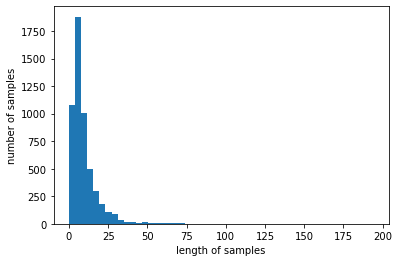

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 194, 64)           64000000  
_________________________________________________________________
dropout (Dropout)            (None, 194, 64)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 192, 64)           12352     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

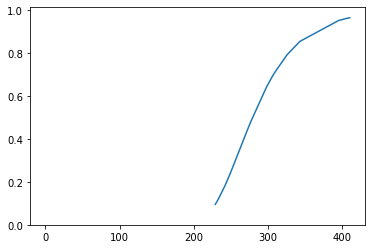

186.96927547559932 69.14165335861802


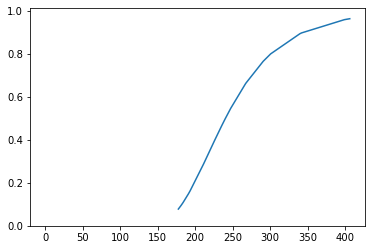

181.05714897787726 59.249597561236996


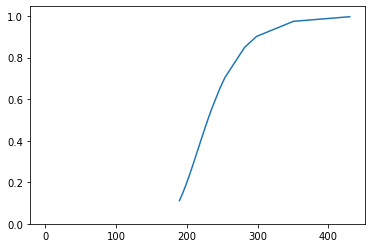

66/66 [==============================] - 1s 1ms/step - loss: 2.8587 - accuracy: 0.1667


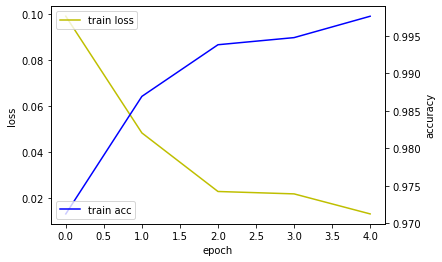

33/33 [==============================] - 0s 6ms/step - loss: 0.9881 - accuracy: 0.7132
테스트 정확도: 0.7132


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
!pip install import_ipynb
import import_ipynb
import model_test_for_openmax_revise
from model_test_for_openmax_revise import *

In [2]:
input_data = str(input())   # 아직 입력부를 구현하지 않아 임시로 입력

조.센.징들의 한계지. 민족성 자체가 동남아나 아프리카 토인이랑 다르게없음 ㅋㅋㅋ


In [3]:
def tokenize(x_data, tokenizer):
    tokenizer.fit_on_texts(x_data) # 데이터의 각 행별로 토큰화 수행
    return tokenizer.texts_to_sequences(x_data)    

In [4]:
x_data = []
x_data.append(input_data)
y_data = -1    # 임시 값

x_data

['조.센.징들의 한계지. 민족성 자체가 동남아나 아프리카 토인이랑 다르게없음 ㅋㅋㅋ']

In [5]:
tokenizer = Tokenizer()
sequences = tokenize(x_data, tokenizer)
sequences

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]

## 모델 적용

In [6]:
!pip install keras.models
from keras.models import model_from_json
json_file = open("model.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [7]:
loaded_model.load_weights("model_weight.h5")

In [8]:
#model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True),metrics= ["accuracy"])
#es = EarlyStopping(monitor='loss', mode='min' , min_delta=0)
#check_point = ModelCheckpoint('apply_model.h5', monitor='loss', mode='min', save_best_only=True)
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics= ["accuracy"])

In [9]:
data = sequences
X_data = pad_sequences(data, maxlen = model_test_for_openmax_revise.maxlen)
X_result = model_test_for_openmax_revise.model.predict(X_data, batch_size=32)
X_Softmax = model_test_for_openmax_revise.model2.predict(X_result)

X_result = X_result[0]
X_result

array([ 0.59426856, -8.781405  ,  4.277201  ], dtype=float32)

## logit Vector, Distance 계산

## 모델 저장

In [10]:
#def distance(input_logit, average):
#    distance = 0
#    for i in range(0,3):
#        distance += (i - average[i])**2
#    return distance
#
#input_dist0 = distance(X_result, average_0)
#input_dist1 = distance(X_result, average_1)
#input_dist2 = distance(X_result, average_2)

In [61]:
def distance(logit_vector, average):
    m = []
    for i in range(0,3):
        m.append(logit_vector[i] - average[i])
    distance = (m[0]**2) + (m[1]**2) + (m[2]**2)
    return distance

dist0 = distance(X_result, average_0)
dist1 = distance(X_result, average_1)
dist2 = distance(X_result, average_2)

82.70522049611708

## CDF 계산

In [11]:
import scipy.stats as s
import matplotlib.pyplot as plt

In [17]:
def calculCDF(dist, input_loc, input_scale):
    CDF = s.exponweib.cdf(dist, *s.exponweib.fit(dist, 2, 5, scale=input_scale, loc=input_loc))     
    return CDF

def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

In [141]:
# inputCDF0 = weib(dist0, model_test_for_openmax_revise.loc0, model_test_for_openmax_revise.scale0)
# inputCDF1 = weib(dist1, model_test_for_openmax_revise.loc1, model_test_for_openmax_revise.scale1)
# inputCDF2 = weib(dist2, model_test_for_openmax_revise.loc2, model_test_for_openmax_revise.scale2)

In [142]:
maxdist0.insert(20,dist0)
maxdist0 = maxdist0[0:21]
maxdist0.sort(reverse=True)
index0 = maxdist0.index(dist0)
maxdist1.insert(20,dist1)
maxdist1 = maxdist1[0:21]
maxdist1.sort(reverse=True)
index1 = maxdist1.index(dist1)
maxdist2.insert(20,dist2)
maxdist2 = maxdist2[0:21]
maxdist2.sort(reverse=True)
index2 = maxdist2.index(dist2)

CDF0 = s.exponweib.cdf(maxdist0, *s.exponweib.fit(maxdist0, 1, 1, scale=2, loc=0))
CDF1 = s.exponweib.cdf(maxdist1, *s.exponweib.fit(maxdist1, 1, 1, scale=2, loc=0))
CDF2 = s.exponweib.cdf(maxdist2, *s.exponweib.fit(maxdist2, 1, 1, scale=2, loc=0))

input_CDF0 = CDF0[index0]
input_CDF1 = CDF1[index1]
input_CDF2 = CDF2[index2]

## Logit Vector 업데이트

In [149]:
updated_logit = []

logit0 = X_result[0]-(X_result[0]*input_CDF0)
logit1 = X_result[1]-(X_result[1]*input_CDF1)
logit2 = X_result[2]-(X_result[2]*input_CDF2)
unknown_logit = input_CDF0*X_result[0] + input_CDF1*X_result[1] + input_CDF2*X_result[2]    # unknown class의 logit vector     

updated_logit = [unknown_logit, logit0, logit1, logit2]

updated_logit

[-0.07405802877174955,
 0.5924051526364758,
 -8.696762915396503,
 4.268480078717445]

## Softmax Layer 통과

In [150]:
# softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [151]:
result_arr = softmax(updated_logit)
arr = result_arr.tolist()
arr

[0.012523482104851137,
 0.02438744941677965,
 2.2538860116407884e-06,
 0.9630868145923577]

## 결과 확인

In [152]:
res = arr.index(max(arr))
res

3

In [153]:
if(res==0):
    resultstr = "Unknown"
elif(res==1):
    resultstr = "혐오성 댓글"
elif(res==2):
    resultstr = "일베 댓글"
elif(res == 3):
    resultstr = "여성 비하성 댓글"
    
resultstr

'여성 비하성 댓글'

In [154]:
print(str(arr[res]) + " 확률로 " + resultstr +"입니다.")

0.9630868145923577 확률로 여성 비하성 댓글입니다.
